In [1]:
import numpy as np
import pandas as pd

Titanic_passengers = pd.read_csv("data/train.csv")
Titanic_passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Preprocessing the Data

In [2]:
Titanic_passengers = Titanic_passengers.drop(['Cabin','Ticket','Name','PassengerId'], axis='columns')

Titanic_passengers = pd.get_dummies(Titanic_passengers, prefix=['Sex', 'Embarked'], drop_first=True)

Titanic_passengers = Titanic_passengers.dropna()
# Shape of our dataset
Titanic_passengers.shape

# Info our dataset
Titanic_passengers.info()

# Describe our dataset
Titanic_passengers.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    714 non-null    int64  
 1   Pclass      714 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       714 non-null    int64  
 4   Parch       714 non-null    int64  
 5   Fare        714 non-null    float64
 6   Sex_male    714 non-null    uint8  
 7   Embarked_Q  714 non-null    uint8  
 8   Embarked_S  714 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 41.1 KB


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.634454,0.039216,0.775910
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.481921,0.194244,0.417274
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000,0.000000,1.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,1.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000


# Splitting Train set and Test set

In [3]:
from sklearn.model_selection import train_test_split

X = Titanic_passengers.iloc[:, 1:].values
Y = Titanic_passengers.iloc[:, 0:1].values #Titanic_passengers['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=1)



# Training..

[Ellipsis]

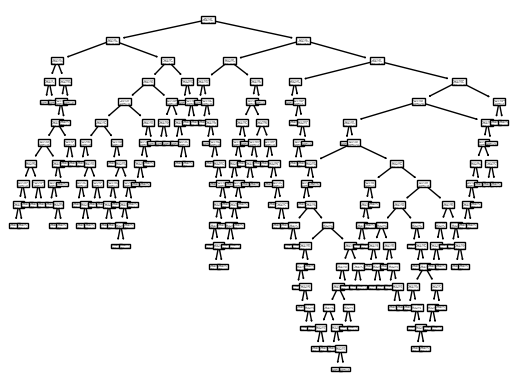

In [4]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

tree.plot_tree(clf)
[...]

# Predicting survivers

In [5]:
Y_pred = clf.predict(X_test)
print(Y_pred)

[1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1
 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0
 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1]


In [6]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(Y_test,Y_pred)  
cm

array([[107,  27],
       [ 18,  63]], dtype=int64)

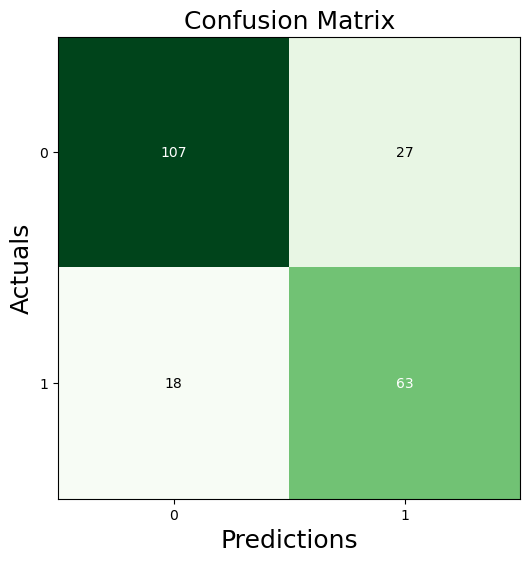

In [7]:
import matplotlib.pyplot as plt 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [8]:
Decision_tree_accuracy = accuracy_score(Y_test,Y_pred)
Decision_tree_accuracy

0.7906976744186046

In [9]:
zeroes = 0
ones = 0
for i in range(0, len(Y_train)):
    if Y_train[i] == 0:
        zeroes += 1
    else:
        ones += 1
 
print(zeroes)
print(ones)
 
val = 1 - ((zeroes/70)*(zeroes/70) + (ones/70)*(ones/70))
print("Gini :", val)
 
match = 0
UnMatch = 0
 
for i in range(30):
    if Y_pred[i] == Y_test[i]:
        match += 1
    else:
        UnMatch += 1
 
accuracy = match/30
print("Accuracy is: ", accuracy)

290
209
Gini : -25.07775510204082
Accuracy is:  0.8666666666666667


In [10]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Ravi/Graphviz/bin'

In [11]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Titanic_passengers") 

'Titanic_passengers.pdf'

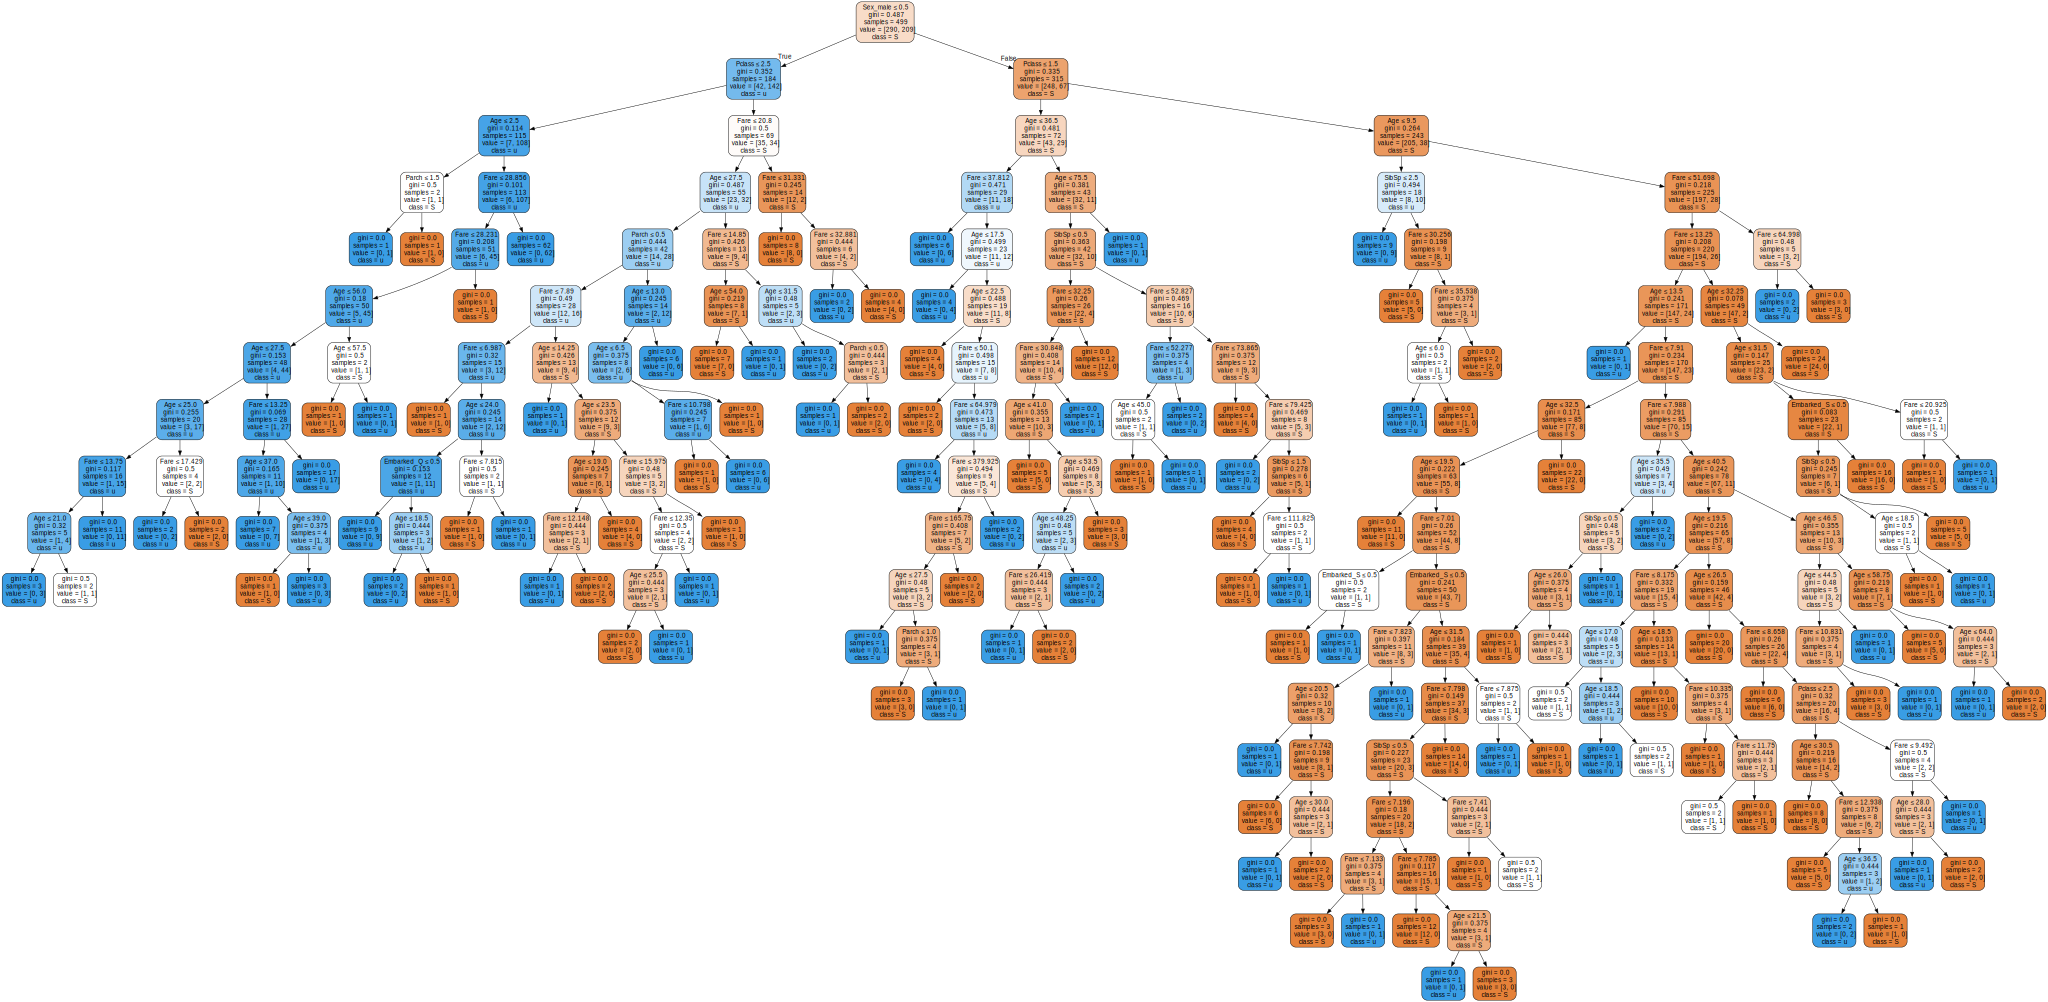

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=Titanic_passengers.columns[1:],  
                     class_names=Titanic_passengers.columns[0],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 